

  # Loan data from Lending Club

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import scipy.stats as stats
from termcolor import colored
print('OK')

OK


 # Loading Data

In [ ]:
#Read and write to excel
dataLoan =  pd.read_csv(r'loans_full_schema.csv')
dataLoan.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,18-Jan,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,18-Jan,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,18-Feb,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,18-Mar,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


## Clean data

In [ ]:
#check rows and columns
dataLoan.shape

(10000, 55)

In [ ]:
#Check the last 5 lines
dataLoan.tail()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,18-Jan,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,18-Feb,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,18-Feb,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,18-Feb,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0
9999,operations analyst,3.0,CT,RENT,66000.0,Not Verified,20.82,NaN,NaN,NaN,...,B4,18-Feb,Current,whole,Cash,11574.83,1658.56,1225.17,433.39,0.0


In [ ]:
#Check the data formatting of columns
dataLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [ ]:
# Count the null values
dataLoan.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [ ]:
# Convert the null values to not specified values in emp_title column
dataLoan['emp_title'] = dataLoan['emp_title'].fillna("not specified")

# Convert the null values to not general income in verification_income_joint column
dataLoan['verification_income_joint'] = dataLoan['verification_income_joint'].fillna("not general income")


# Replace NaN values with 0
dataLoan['annual_income_joint'] = dataLoan['annual_income_joint'].fillna(0)

dataLoan['debt_to_income_joint'] = dataLoan['debt_to_income_joint'].fillna(0)

dataLoan['num_accounts_120d_past_due'] = dataLoan['num_accounts_120d_past_due'].fillna(0)


In [ ]:
# Remove columns 'months_since_last_delinq' and 'months_since_90d_late'
dataLoan = dataLoan.drop(['months_since_last_delinq', 'months_since_90d_late'], axis=1)


In [ ]:
# Convert NA values to mean values of the columns: emp_length, months_since_last_credit_inquiry
dataLoan = dataLoan.fillna(dataLoan.mean())


<ipython-input-135-89917df6132b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataLoan = dataLoan.fillna(dataLoan.mean())


In [ ]:
dataLoan.describe()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts

## Visualize data

### 1. The largest number of borrowers in the states.

In [ ]:
summary_by_state = dataLoan.groupby(["state"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [ ]:
summary_by_state.sort_values('no_borrowers', ascending=False, inplace=True, ignore_index=True)


In [ ]:
summary_by_state['Percentage'] = summary_by_state['no_borrowers']/summary_by_state['no_borrowers'].sum()*100


In [ ]:
summary_by_state['Cummulate']  = summary_by_state['Percentage'].cumsum()


In [ ]:
summary_by_state.head(10)

,state,no_borrowers,total_loan_amount,Percentage,Cummulate
0,CA,1330,22073700,13.30,13.30
1,TX,806,13755275,8.06,21.36
2,NY,793,12589650,7.93,29.29
3,FL,732,11203675,7.32,36.61
4,IL,382,6776600,3.82,40.43
5,OH,338,5434125,3.38,43.81
6,NJ,338,5665850,3.38,47.19
7,GA,334,5545300,3.34,50.53
8,NC,299,4809225,2.99,53.52
9,PA,298,4665825,2.98,56.50


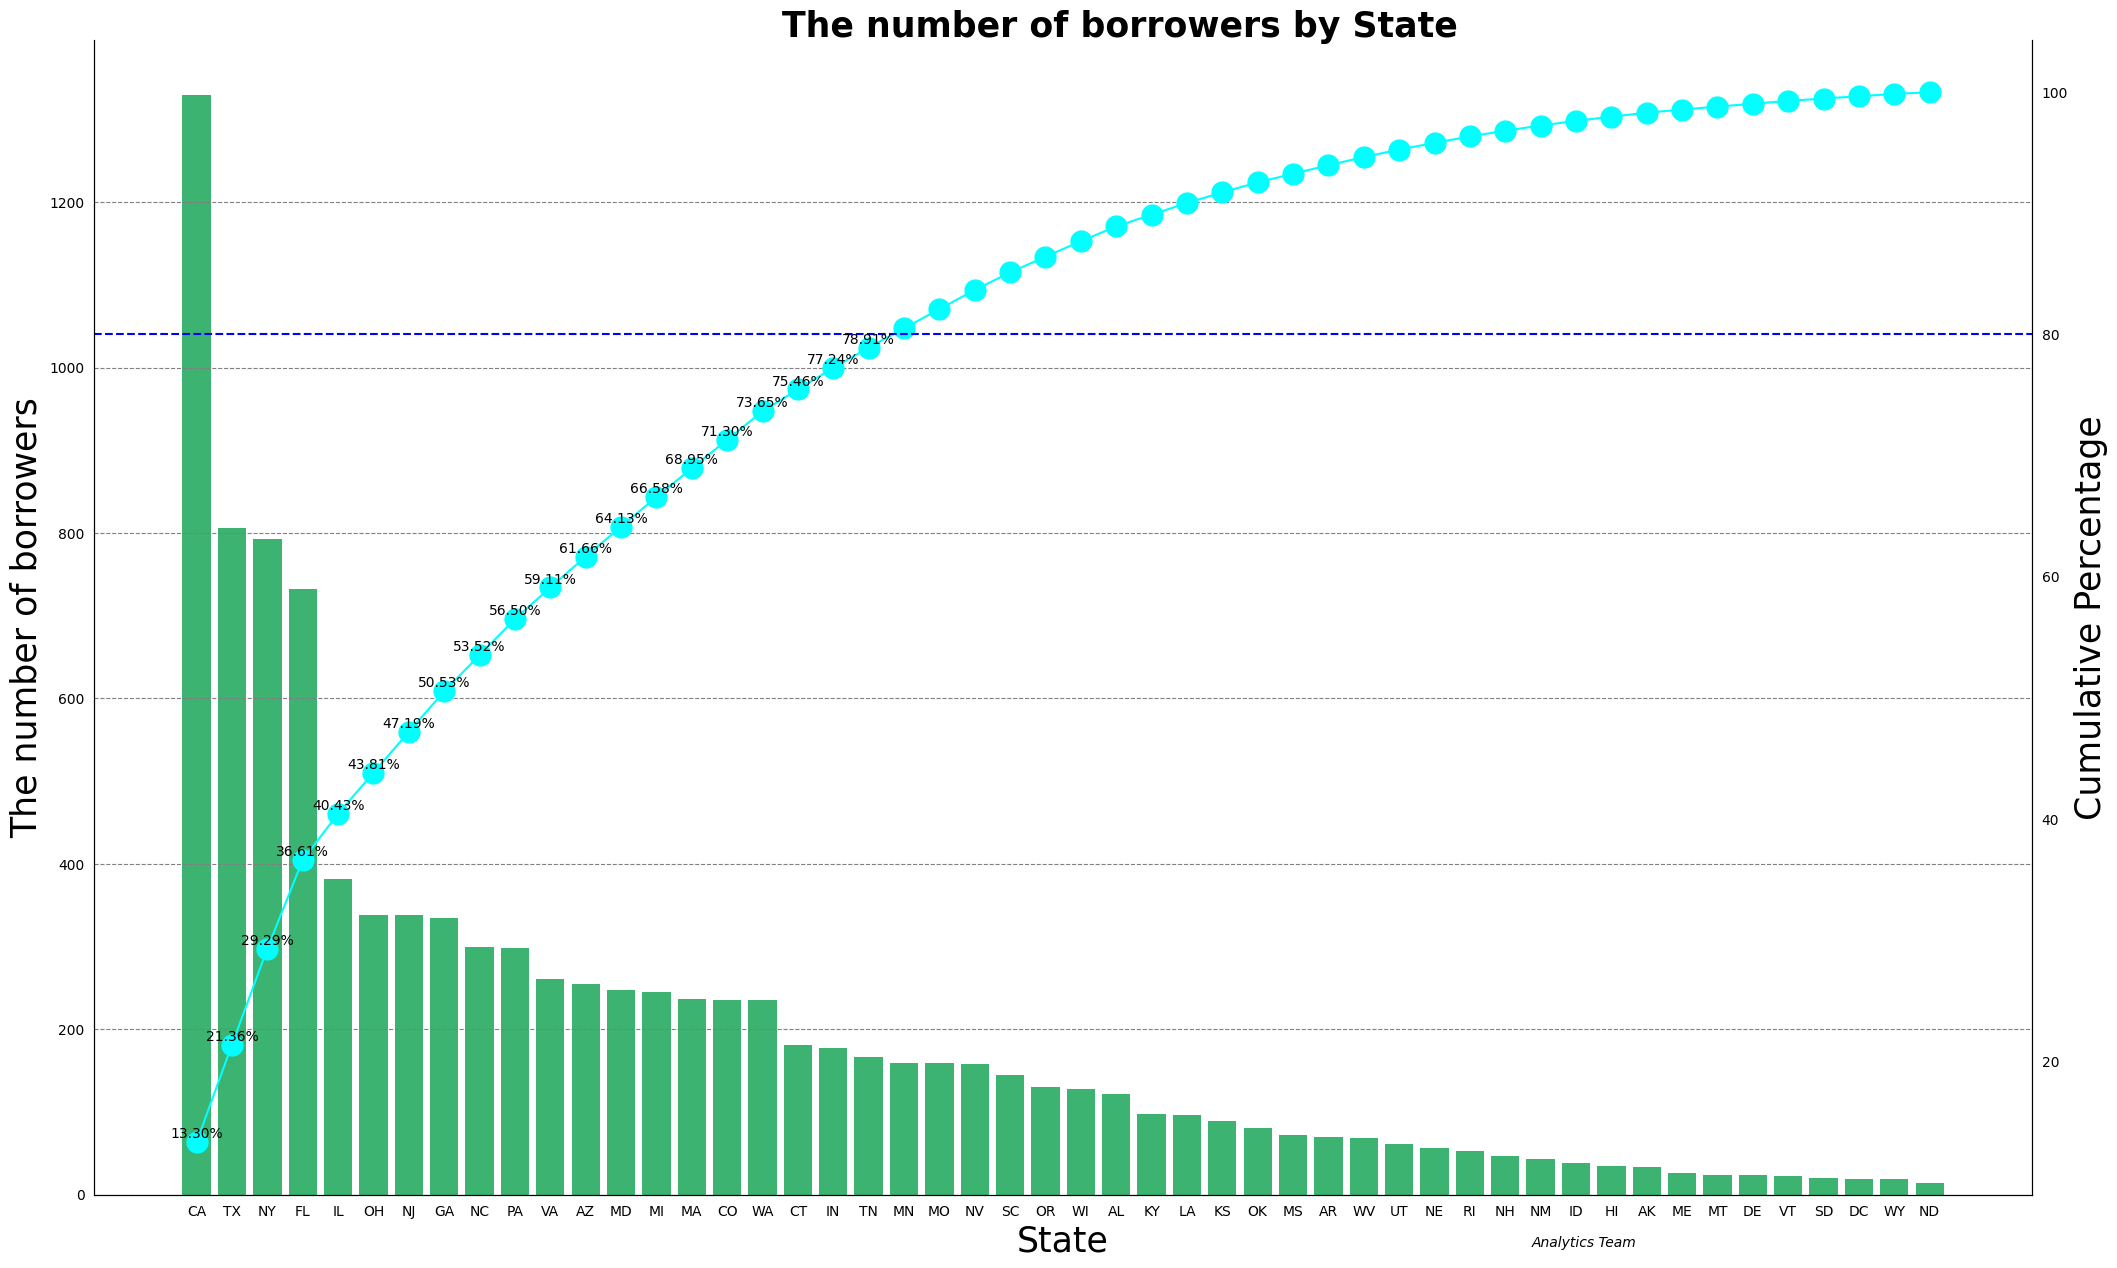

In [ ]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = summary_by_state['state']
ys = summary_by_state['no_borrowers']
yl = summary_by_state['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')

ax1.set_xlabel("State", fontsize = 25)
ax1.set_ylabel("The number of borrowers", fontsize = 25)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=15)

ax2.axhline(80, color="blue", linestyle="--") # Create line 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False)

ax2.set_ylabel("Cumulative Percentage", fontsize = 25)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.suptitle('The number of borrowers by State', fontweight='bold', size=25, horizontalalignment='left', x=0.4, y = 0.9)
plt.text(0.7, 0.075, "Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

**Conclude:**
CA is the state with the largest number of borrowers up to 13.3%. The next states TX, NY, and FL also have a higher number of borrowers than the rest. In addition, 20 out of 50 states have nearly 80% more borrowers than the rest.



###2. The top 10 states with the largest amount loan.

In [ ]:
summary_by_state['proportion'] = summary_by_state['total_loan_amount']/summary_by_state['total_loan_amount'].sum()*100

In [ ]:
top10_state = summary_by_state.loc[:, ['state','total_loan_amount','proportion']].head(10).copy()

In [ ]:
top10_state['total_loan_amount'] = top10_state['total_loan_amount']/1000


In [ ]:
top10_state.sort_values('total_loan_amount', ascending=True, inplace=True, ignore_index=True)


In [ ]:
top10_state

,state,total_loan_amount,proportion
0,PA,4665.825,2.851636
1,NC,4809.225,2.939279
2,OH,5434.125,3.321202
3,GA,5545.300,3.389149
4,NJ,5665.850,3.462827
5,IL,6776.600,4.141689
6,FL,11203.675,6.847407
7,NY,12589.650,7.694481
8,TX,13755.275,8.406882
9,CA,22073.700,13.490896


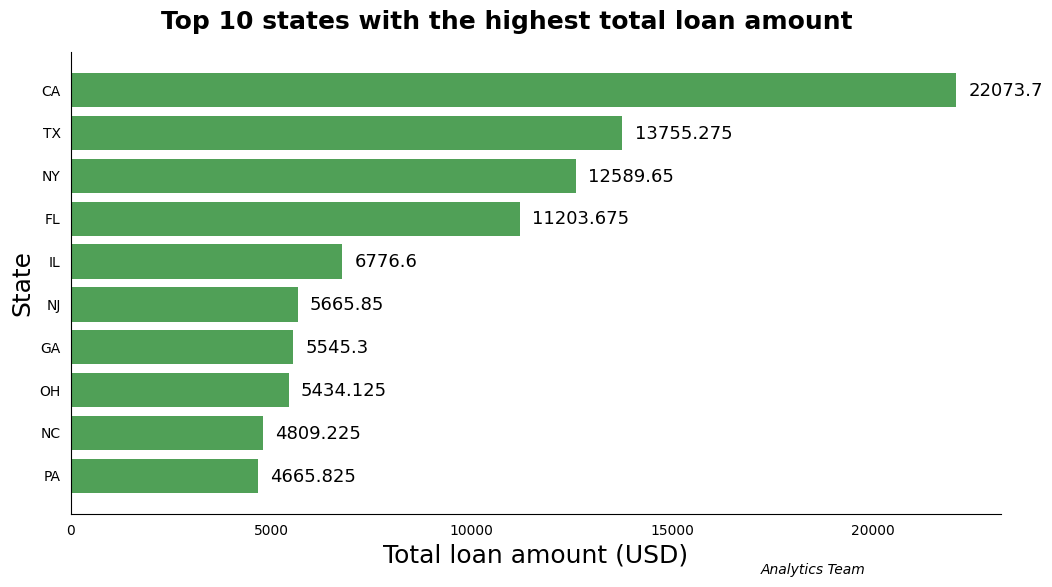

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_state['state'],top10_state['total_loan_amount'],data=top10_state,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_state.total_loan_amount[i], xy=(p.get_width()+300, p.get_y()+p.get_height()/3))
    t1.set(size=13)
    i+=1

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label axes and source:
plt.suptitle('Top 10 states with the highest total loan amount', fontweight='bold', size=18, horizontalalignment='left', x=0.2, y = 0.95)
plt.xlabel('Total loan amount (USD)', size=18)
plt.ylabel('State', size=18)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclude:**
CA is the state with the largest loan amount up to 22,073 USD and the loan amount decreases to the remaining states. In particular, the state PA has the lowest loan amount is 4665,825 USD.

###3. The most common loan purpose.

In [ ]:
summary_by_loan_purpose = dataLoan.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [ ]:
summary_by_loan_purpose.sort_values('no_borrowers', ascending=True, inplace=True, ignore_index=True)
summary_by_loan_purpose

,loan_purpose,no_borrowers,total_loan_amount
0,renewable_energy,10,140000
1,vacation,62,421900
2,moving,69,682675
3,small_business,125,2477500
4,car,131,1361250
5,house,151,2689275
6,medical,162,1836800
7,major_purchase,303,4752425
8,home_improvement,680,11719225
9,other,914,11819025


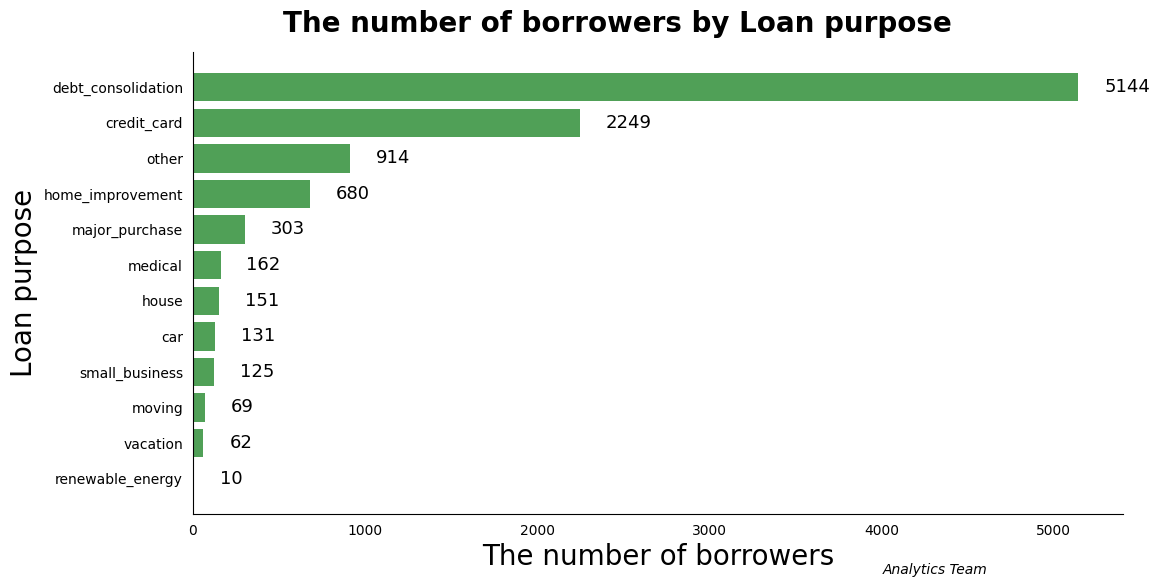

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(summary_by_loan_purpose['loan_purpose'],summary_by_loan_purpose['no_borrowers'],data=summary_by_loan_purpose,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.no_borrowers[i], xy=(p.get_width()+150, p.get_y()+p.get_height()/3))
    t1.set(size=13)
    i+=1

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label axes and source:
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=20, horizontalalignment='left', x=0.2, y = 0.95)

plt.xlabel('The number of borrowers', size=20)
plt.ylabel('Loan purpose', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Conclude**:
Most loans for debt consolidation (debt_consolidation) are up to 5144. The lowest is for renewable energy (renewable_energy) with only 10 borrowers.

###4. The annual revenue of customers.

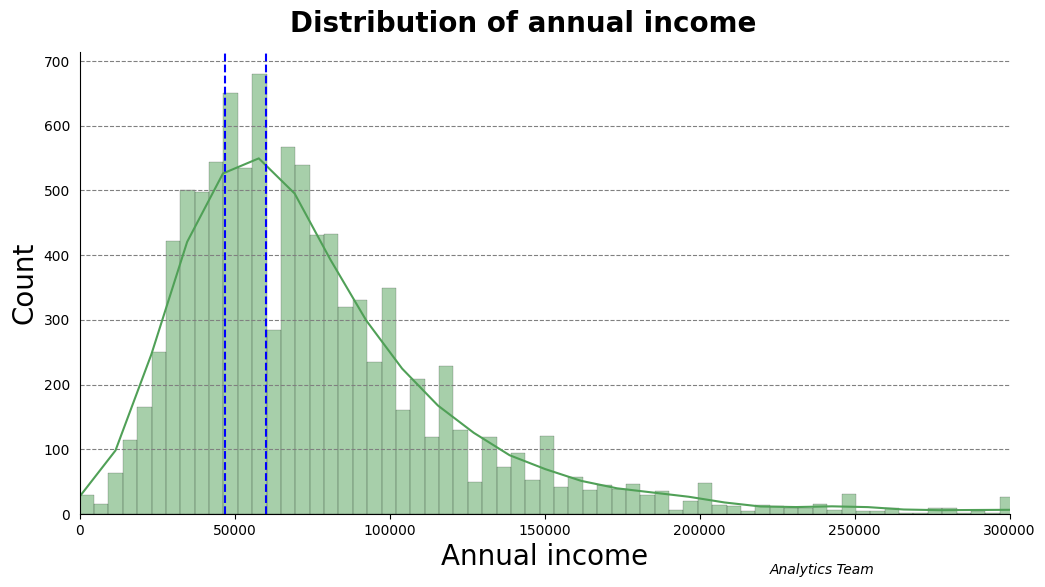

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=dataLoan, x=dataLoan.annual_income, kde=True, color='#50a057')
ax.axvline(47000, color="blue", linestyle="--")
ax.axvline(60000, color="blue", linestyle="--")
plt.xlim(0, 300000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# # Remove the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False)

# Add title, label axes and source:
plt.suptitle('Distribution of annual income', fontweight='bold', size=20, horizontalalignment='left', x=0.3, y = 0.95)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Annual income', size=20)
plt.ylabel('Count', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclude**:
Borrowers' annual income is mostly concentrated between $47,000 and $60,000.

###5. The relationship between loan status and debt on income.

In [ ]:
data = dataLoan.loc[:, ['loan_status','debt_to_income']].copy()

In [ ]:
mean_list = data.groupby('loan_status', as_index=False)['debt_to_income'].mean().rename(columns={'debt_to_income':'mean'})

In [ ]:
mean_list.sort_values('mean', ascending=True, inplace=True, ignore_index=True)

In [ ]:
mean_list

,loan_status,mean
0,Late (31-120 days),16.039394
1,Fully Paid,17.490417
2,Late (16-30 days),17.952368
3,Charged Off,18.457143
4,Current,19.419449
5,In Grace Period,19.945943


In [ ]:
data1 = pd.merge(data,mean_list,on='loan_status',how='left')

In [ ]:
data1.sort_values('mean', ascending=True, inplace=True, ignore_index=True)


In [ ]:
data1

,loan_status,debt_to_income,mean
0,Late (31-120 days),24.66,16.039394
1,Late (31-120 days),27.68,16.039394
2,Late (31-120 days),0.45,16.039394
3,Late (31-120 days),4.35,16.039394
4,Late (31-120 days),31.08,16.039394
...,...,...,...
9995,In Grace Period,15.86,19.945943
9996,In Grace Period,17.80,19.945943
9997,In Grace Period,28.27,19.945943
9998,In Grace Period,1.48,19.945943


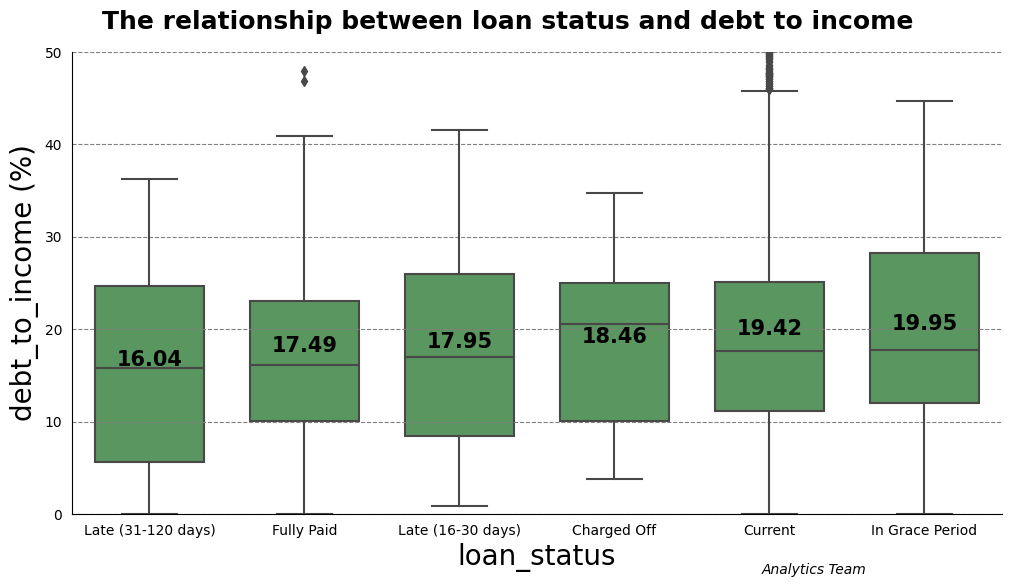

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
box_width=0.7

ax=sns.boxplot(x=data1.loan_status, y=data1.debt_to_income, data=data1, width=box_width, color='#50a057')

# show medians
i = 0
for i in range(mean_list.shape[0]):
    x = i #+box_width/2*1.05
    y = mean_list.loc[i,['mean']]
    ax.annotate('%.2f' %mean_list.loc[i,['mean']],
                  (x,y),
                  #color='white',
                  weight='semibold',
                ha='center',
                  size=15
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label axes and source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=18, horizontalalignment='left', x=0.15, y = 0.95)
plt.xlabel('loan_status', size=20)
plt.ylabel('debt_to_income (%)', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.ylim(0, 50)
plt.show()

**Conclude**
* In general, the loan positions are high in the average debt-to-income ratio of each loan position. Except, the Charged Off loan status has a debt-to-total income ratio of 18.46% lower than the average debt-to-income ratio.
* Loans with a delay of 31-120 days belong to the group of borrowers with the lowest debt-to-total income ratio of 16.4% and the highest debt-to-income ratio of 19.95%. loans with In Grace Period status (within the grace period).
* In addition, loans with Fully Paid status and Current status have a debt-to-total income ratio of 17.49%, respectively; 19.42%, but some debt-to-income groups exceed 40%.

### 6. The payment method used popularly for debt payments.

In [ ]:
summary_by_payment = dataLoan.groupby(["disbursement_method"], as_index=False)\
    ["emp_title"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_payers','sum':'total_loan_amount'})

In [ ]:
summary_by_payment.sort_values('no_payers', ascending=True, inplace=True, ignore_index=True)
summary_by_payment

,disbursement_method,no_payers,total_loan_amount
0,DirectPay,716,senior inspectorprogram managercabinet maker/i...
1,Cash,9284,global config engineer warehouse office clerka...


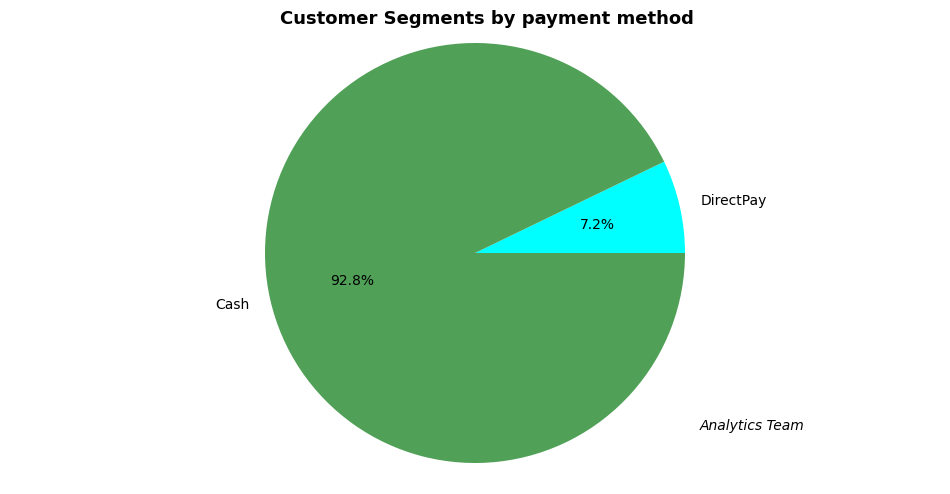

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
# Sample data
segments = ['DirectPay', 'Cash']
counts = [716, 9284]
colors = ['#00FFFF', '#50a057']
# Plotting the pie chart
plt.pie(counts, labels=segments, colors=colors, autopct='%1.1f%%',)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title

plt.suptitle('Customer Segments by payment method', fontweight='bold', size=13, horizontalalignment='left', x=0.35, y = 0.9)

plt.text(0.7, 0.2, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclude:**
In general, we see that customers who make payments via directPay (automatic payment via electronic payment gateway) is 7.2%, much lower than Cash (cash payment).

### 7. Segment customers by years of work experience.

In [ ]:
year_bins = dataLoan.copy()

In [ ]:
year_bins['emp_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: emp_length
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [ ]:
for year_bins in [year_bins]:
    # Convert 'emp_length' column to integers
    year_bins['emp_length'] = year_bins['emp_length'].astype(int)

    year_bins.loc[year_bins['emp_length'] <= 1, 'AgeGroup'] = 'Fresher'
    year_bins.loc[(year_bins['emp_length'] > 1) & (year_bins['emp_length'] <= 3), 'AgeGroup'] = 'Junior'
    year_bins.loc[(year_bins['emp_length'] > 3) & (year_bins['emp_length'] <= 7), 'AgeGroup'] = 'Senior'
    year_bins.loc[year_bins['emp_length'] > 7, 'AgeGroup'] = 'Manager'

year_bins.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,AgeGroup
0,global config engineer,3,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,not general income,0.00,...,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Junior
1,warehouse office clerk,10,HI,RENT,40000.0,Not Verified,5.04,0.0,not general income,0.00,...,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Manager
2,assembly,3,WI,RENT,40000.0,Source Verified,21.15,0.0,not general income,0.00,...,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Junior
3,customer service,1,PA,RENT,30000.0,Not Verified,10.16,0.0,not general income,0.00,...,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Fresher
4,security supervisor,10,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Manager


In [ ]:
year_bins["AgeGroup"].value_counts()

Manager    3951
Senior     2845
Junior     1829
Fresher    1375
Name: AgeGroup, dtype: int64

In [ ]:
# resetting the DataFrame index
year_bins = year_bins.reset_index()

In [ ]:
year_bins.rename(columns = {'index':'customer_id'}, inplace = True)
year_bins.head(5)

,customer_id,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,AgeGroup
0,0,global config engineer,3,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,not general income,...,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Junior
1,1,warehouse office clerk,10,HI,RENT,40000.0,Not Verified,5.04,0.0,not general income,...,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Manager
2,2,assembly,3,WI,RENT,40000.0,Source Verified,21.15,0.0,not general income,...,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Junior
3,3,customer service,1,PA,RENT,30000.0,Not Verified,10.16,0.0,not general income,...,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Fresher
4,4,security supervisor,10,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,...,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Manager


In [ ]:
# Create group_var variable
year_bins["group_var"] = year_bins.AgeGroup

In [ ]:
# groupby with row count
year_bins.groupby("group_var", dropna=False).size()

group_var
Fresher    1375
Junior     1829
Manager    3951
Senior     2845
dtype: int64

In [ ]:
# Convert NaN variables to Other variable to avoid errors when plot
year_bins['group_var'] = np.select([year_bins['group_var'].isnull()],\
                             ['Other'],\
                             default=year_bins['group_var'])

In [ ]:
# Prepare data
year_bins = year_bins.groupby("group_var", as_index=False, dropna=False)\
    ['customer_id'].nunique(dropna=False).\
    rename(columns={"customer_id":"no"})

year_bins["total"] = sum(year_bins['no'])
year_bins["pct"] = 100*year_bins['no'] / year_bins['total']

In [ ]:
year_bins.sort_values('no', ascending=True, inplace=True, ignore_index=True)
year_bins

,group_var,no,total,pct
0,Fresher,1375,10000,13.75
1,Junior,1829,10000,18.29
2,Senior,2845,10000,28.45
3,Manager,3951,10000,39.51


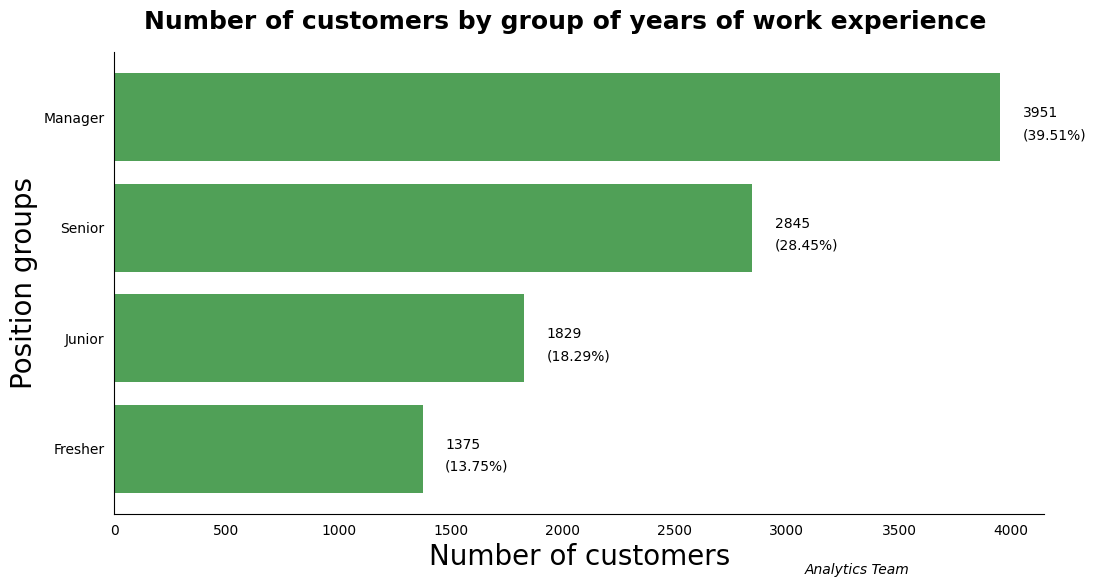

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('group_var', 'no', data=year_bins, color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(year_bins.no[i], xy=(p.get_width()+100, p.get_y()+p.get_height()/2))
    t2 = ax.annotate('('+str(year_bins.pct.round(2)[i])+'%)', xy=(p.get_width()+100, p.get_y()+0.2))
    t1.set(size=10)
    t2.set(size=10)
    i+=1

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label axes and source:
plt.suptitle('Number of customers by group of years of work experience', fontweight='bold', size=18, horizontalalignment='left', x=0.15, y = 0.95)
plt.xlabel('Number of customers', size=20)
plt.ylabel('Position groups', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Conclude:**
This chart shows that the majority of borrowers in the Manager position have 3951 people, accounting for 39.51% and the proportion of borrowers decreases in order of position: Senior; Junior; Fresher is equivalent to 28.45%; 18.29%; 13.75%.

###8. The relationship between interest rate and customer segment.

In [ ]:
dataLoan_grade = dataLoan.loc[:, ['grade','interest_rate']].copy()

In [ ]:
dataLoan_grade.sort_values('grade', ascending=True, inplace=True, ignore_index=True)

In [ ]:
dataLoan_grade

,grade,interest_rate
0,A,6.72
1,A,7.34
2,A,6.07
3,A,7.34
4,A,7.34
...,...,...
9995,G,30.79
9996,G,30.79
9997,G,30.79
9998,G,30.79


In [ ]:
mean_list_grade = dataLoan_grade.groupby('grade')['interest_rate'].median()

In [ ]:
mean_list_grade

grade
A     6.72
B    10.42
C    14.07
D    19.03
E    24.85
F    28.72
G    30.79
Name: interest_rate, dtype: float64

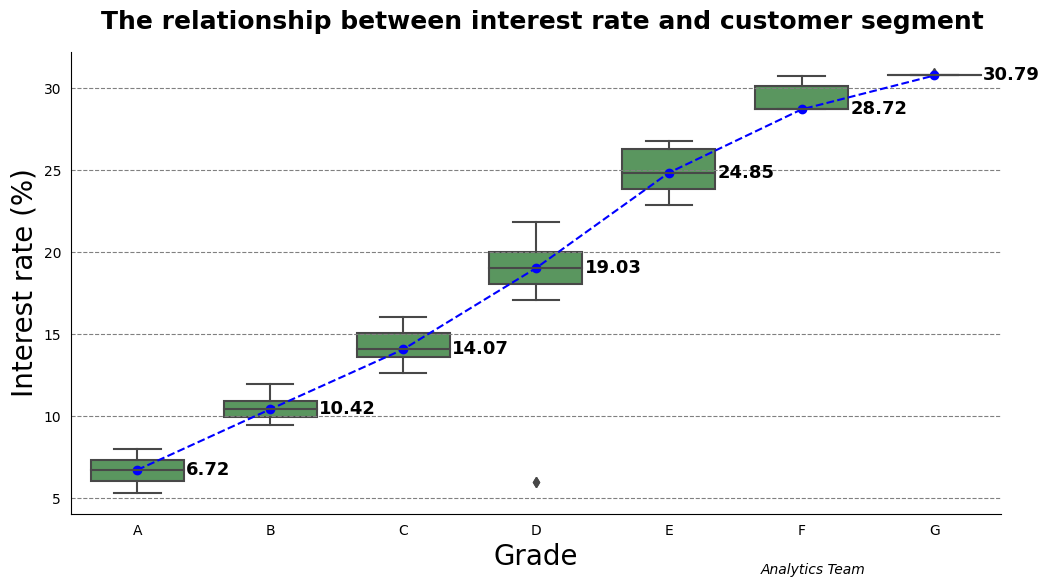

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

box_width=0.7
ax=sns.boxplot(x=dataLoan_grade.grade, y=dataLoan_grade.interest_rate, data=dataLoan_grade, width=box_width, color='#50a057')
ax.plot(range(len(mean_list_grade)), mean_list_grade, 'bo--', label= "versicolor")

# show medians
i = 0
for i in range(len(mean_list_grade)):
    x = i+box_width/2*1.05
    y = mean_list_grade[i]
    ax.annotate('%.2f' %mean_list_grade[i],
                  (x,y-0.3),
                  #color='white',
                  weight='semibold',
                  size=13
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Remove the top line and the right line of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label axes and source:
plt.suptitle('The relationship between interest rate and customer segment', fontweight='bold', size=18, horizontalalignment='left', x=0.15, y = 0.95)
plt.xlabel('Grade', size=20)
plt.ylabel('Interest rate (%)', size=20)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Conclude:**
* Rank ranges from A to G in ascending order with loan interest rates from 6.72% to 30.79%. The closer the rank goes to G, the higher the loan interest rate, which means the higher the level of risk (the possibility of default). And conversely, the closer the rating is to A, the lower the lending interest rate, and the lower the risk level.
* In addition, the customer segment at level D has some special customers with a preferential interest rate of nearly 6.72% compared to level A.